In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Definir la función de prueba (Rosenbrock)
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2


In [4]:
# Definir la derivada parcial de la función de prueba (Rosenbrock)
def rosenbrock_grad(x, y):
    grad_x = 2 * (200 * x**3 - 200 * x * y + x - 1)
    grad_y = 200 * (y - x**2)
    return grad_x, grad_y

In [6]:
# Definir el método de gradiente con reinicialización
def gradient_descent_restart(start_point, learning_rate, num_iterations, threshold):
    current_point = start_point
    path = [current_point]
    for i in range(num_iterations):
        grad_x, grad_y = rosenbrock_grad(current_point[0], current_point[1])
        new_point = current_point - learning_rate * np.array([grad_x, grad_y])

        if rosenbrock(*new_point) < rosenbrock(*current_point):
            current_point = new_point
        else:
            current_point = np.random.uniform(-5, 5, 2)  # Reinicialización aleatoria

        path.append(current_point)

        if np.linalg.norm(new_point - current_point) < threshold:
            break

    return current_point, path

In [7]:
# Configuración de los parámetros del algoritmo
start_point = np.array([-4, -4])
learning_rate = 0.001
num_iterations = 1000
threshold = 1e-5

In [8]:
# Ejecutar el método de gradiente con reinicialización
min_point, path = gradient_descent_restart(start_point, learning_rate, num_iterations, threshold)

In [9]:
# Mostrar el resultado
print("Mínimo encontrado:", min_point)
print("Valor de la función en el mínimo:", rosenbrock(*min_point))

Mínimo encontrado: [ 0.2606026  -0.77276974]
Valor de la función en el mínimo: 71.22157599652921


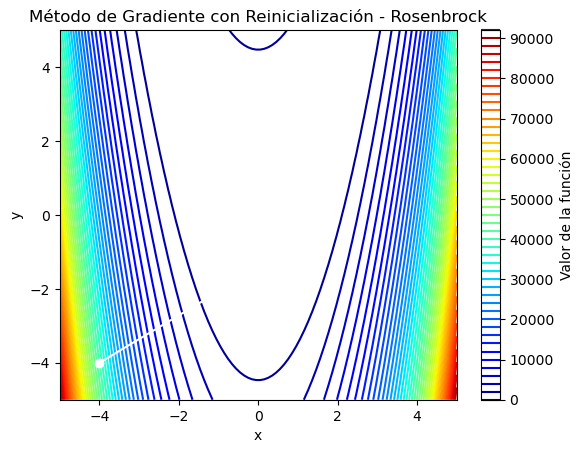

In [10]:
# Graficar la función y el camino seguido por el algoritmo
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

plt.contour(X, Y, Z, levels=50, cmap='jet')
plt.plot(*zip(*path), color='white', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Método de Gradiente con Reinicialización - Rosenbrock')
plt.colorbar(label='Valor de la función')
plt.show()
